# Exploring the Airbnb London Listings dataset 
This jupyter notebook will start by exploring some simple questions about the types of listings in london.

Firstly, importing pandas, numpy, and the dataset.

In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
airbnb = pd.read_csv('data/listings.csv', low_memory=False, header=0)
#list(airbnb.columns) 

Airbnb hosts can list entire homes/apartments, private or shared rooms.

Private rooms are more like hotels, and a shared room more like a hostel. This could be disruptive to neighbourhoods, as Airbnb has said: 'Depending on the room type, availability, and activity, an airbnb listing could be more like a hotel, disruptive for neighbours, taking away housing, and illegal.'

In [282]:
airbnb_room_type = airbnb.groupby(['room_type']).count()['id']
print(airbnb_room_type)

room_type
Entire home/apt    45065
Private room       34964
Shared room          738
Name: id, dtype: int64


We therefore get, a count of 45065 for entire home or appartment, 34964 for Private Room, and 738 for share rooms. 

But it would be useful to know the proportion of these that are of each category. 

In [283]:
percent_room_type = airbnb_room_type/(airbnb['room_type'].count())
print(percent_room_type)

room_type
Entire home/apt    0.557963
Private room       0.432900
Shared room        0.009137
Name: id, dtype: float64


We therefore see that the largest proportion of listings, 56% are for entire home of apartments, followed by 43% of the listings that are for private rooms, and finally 1% of the listings that are for shared rooms. 

Other important information, include the fact that Airbnb, has stated that: 'Entire homes or apartments highly available year-round for tourists, probably don't have the owner present, could be illegal, and more importantly, are displacing residents.' It would be interesting to observe, how many of the listings are available all year round, and what room type these often are. Airbnb define the following goupings based on the level of availability the listing has: 

- Low availability 0-60 days a year
- Medium availability 60-90 days a year
- High availability 90-365 days a year

This next section will work out the percentage of the listings that fall into each of these categories. 

In [284]:
# calculate what percentage/count of listings are 
# highly avialable > 90 days. 
listings = airbnb['id'].count()
availability = airbnb['availability_365']
availability_count = availability.count()

print("Total Number of Listings: " + str(listings))

def get_availability(x):
    return airbnb[x]['id']

availability_low = get_availability(availability <= 60)
availability_medium = get_availability((availability <= 90) & (availability > 60))
availability_high = get_availability(availability > 90)

print("Low Availability Count:", str(availability_low.count()))
print("Medium Availability Count:", str(availability_medium.count()))
print("High Availability Count:", str(availability_high.count()))

def calculate_percent(x):
    x = x/listings
    return x

print("Low Availability Percent:", str(calculate_percent(availability_low).count()))
print("Medium Availability Percent:", str(calculate_percent(availability_medium).count()))
print("High Availability Percent:", str(calculate_percent(availability_high).count()))
     

Total Number of Listings: 80767
Low Availability Count: 40557
Medium Availability Count: 6958
High Availability Count: 33252
Low Availability Percent: 40557
Medium Availability Percent: 6958
High Availability Percent: 33252


Scatter plot, to see if there is any clustering, as in is one type of room more likely to be at one end of the graph (e.g. is shared room less availabile, than a private room etc.)

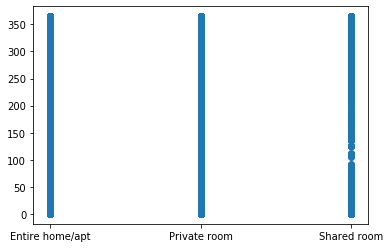

In [285]:
plt.scatter(airbnb['room_type'], availability)

We don't see much in the scatter plot. Maybe some grouping in 'Shared room', but all the others appear to have continuous availabiity. 

We can check this statistically, and see what percentage of each room type, entire/private/shared that fall into each of the availability categories. If high avialability on differnet room types may cause different amounts of disturbance for the local neighbourhoods. High vailability on entire listing could lead to a lack of housing avialability, and high avialability of private rooms may lead to a business in a hotel style enviroment. 

In [288]:
#calculate the percentage of each room type that has each type of availability

def percent_availability(roomtype, availability):
    all_listings = airbnb[airbnb.room_type == roomtype]
    filtered_listings = all_listings[all_listings['id'].isin(availability)]['id']
    return (filtered_listings.count()/all_listings.count())['id']

def print_percent_availability(roomtype, availability, availability_label):
    percentage = percent_availability(roomtype, availability)
    print(roomtype + ' - ' + availability_label + ': ' + str(percentage))
    
print('Percentage of room type for each availability.')

print_percent_availability('Entire home/apt', availability_low, 'low')
print_percent_availability('Entire home/apt', availability_medium, 'medium')
print_percent_availability('Entire home/apt', availability_high, 'high')
print_percent_availability('Private room', availability_low, 'low')
print_percent_availability('Private room', availability_medium, 'medium')
print_percent_availability('Private room', availability_high, 'high')
print_percent_availability('Shared room', availability_low, 'low')
print_percent_availability('Shared room', availability_medium, 'medium')
print_percent_availability('Shared room', availability_high, 'high')


Percentage of room type for each availability.
Entire home/apt - low: 0.5218018417840896
Entire home/apt - medium: 0.06858981471208254
Entire home/apt - high: 0.4096083435038278
Private room - low: 0.47943599130534265
Private room - medium: 0.108254204324448
Private room - high: 0.41230980437020937
Shared room - low: 0.3780487804878049
Shared room - medium: 0.1111111111111111
Shared room - high: 0.510840108401084


This data would be easier to visualise in a stacked bar graph, visualised below. 

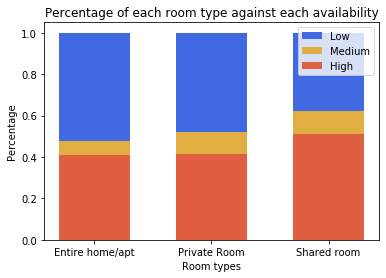

In [298]:
room_types = ['Entire home/apt', 'Private Room', 'Shared room']
low_availability_values = np.array([percent_availability('Entire home/apt', availability_low), 
                           percent_availability('Private room', availability_low),
                           percent_availability('Shared room', availability_low)])
medium_availability_values = np.array([percent_availability('Entire home/apt', availability_medium),
                              percent_availability('Private room', availability_medium),
                              percent_availability('Shared room', availability_medium)])
high_availability_values = np.array([percent_availability('Entire home/apt', availability_high),
                            percent_availability('Private room', availability_high), 
                            percent_availability('Shared room', availability_high)])

ind = [x for x, _ in enumerate(room_types)]

plt.bar(ind, low_availability_values, width=0.6, label='Low', color='#4169E1', bottom=medium_availability_values+high_availability_values)
plt.bar(ind, medium_availability_values, width=0.6, label='Medium', color='#e1ae41', bottom=high_availability_values)
plt.bar(ind, high_availability_values, width=0.6, label='High', color='#e15f41')

plt.ylabel('Percentage')
plt.xlabel('Room types')
plt.title('Percentage of each room type against each availability')

plt.xticks(ind, room_types)
plt.legend(loc='upper right')
plt.show()

Want to know if high availability properties effect the availability of housing in certain post-code zones in london. 

--- so first see which post code zones have high availability of entire home/apt. 
--- then are these post code areas affecting the availability of housing. 

In [358]:
import re

postcode_area_regex = re.compile("(?P<zipcode>[A-Z]{1,2}\d[A-Z\d]?)")

def GroupColFunc(df, ind, col):
    result = postcode_area_regex.search(str(df[col].loc[ind]))
    
    if result is None:
        return "Unknown"
    
    return result.group(1)

# print(airbnb['zipcode'].loc[0])

# postcodes = airbnb['zipcode'].str.extract(r'(?P<zipcode>[A-Z]{1,2}\d[A-Z\d]?)')

airbnb_zipcode_area = airbnb.groupby(lambda x: GroupColFunc(airbnb, x, 'zipcode')).count()['id']

#airbnb_zipcode_area = airbnb_zipcode_area.loc[airbnb[count] >= 10]

print(airbnb_zipcode_area.sort_values(ascending=False))

E1         2964
W2         2740
Unknown    2696
N1         2667
E2         2074
NW1        1998
SE1        1955
E14        1659
SW6        1458
SW11       1386
E8         1354
NW6        1220
W14        1139
N16        1017
E3          966
W9          943
NW10        927
N7          905
SW1V        899
SW18        898
NW3         881
SW19        857
SW3         854
SW5         832
E5          822
SE16        817
W11         807
W12         801
SW7         799
N4          786
           ... 
HA97          1
NW15          1
NW21          1
SM54          1
E70           1
SM52          1
SM38          1
SM13          1
SL3           1
HA87          1
SE91          1
SE58          1
SE41          1
SE39          1
E61           1
RM53          1
E77           1
NW22          1
E78           1
RM30          1
RH13          1
PE20          1
NW96          1
NW95          1
NW87          1
NW74          1
NW66          1
NW61          1
NW36          1
AL3           1
Name: id, Length: 463, d

Want to see the proportion of high availability in each of these post codes. 

In [344]:
def percent_availability_by_zip(roomtype, availability, zipcode):
    all_listings = airbnb[(airbnb.room_type == roomtype) & (airbnb.zipcode.str.startswith(zipcode))]
    filtered_listings = all_listings[all_listings['id'].isin(availability)]['id']
    return (filtered_listings.count()/all_listings.count())['id']

def print_percent_availability_by_zip(roomtype, availability, zipcode, availability_label):
    percentage = percent_availability_by_zip(roomtype, availability, zipcode)
    print(roomtype + ' - ' + availability_label + ' - ' + zipcode + ': ' + str(percentage))
    
for items in airbnb_zipcode_area.iteritems():
    print_percent_availability_by_zip('Entire home/apt', availability_high, items[0], 'High')

Entire home/apt - High - AL3: 1.0
Entire home/apt - High - BN3: nan
Entire home/apt - High - BR1: 0.55
Entire home/apt - High - BR2: 0.5185185185185185
Entire home/apt - High - BR3: 0.6041666666666666
Entire home/apt - High - BR35: nan
Entire home/apt - High - BR4: 0.5
Entire home/apt - High - BR49: nan
Entire home/apt - High - BR5: 0.9264705882352942
Entire home/apt - High - BR6: 0.6
Entire home/apt - High - BR7: 0.7142857142857143
Entire home/apt - High - BT15: 0.0
Entire home/apt - High - CR0: 0.49748743718592964
Entire home/apt - High - CR01: 1.0
Entire home/apt - High - CR02: 1.0
Entire home/apt - High - CR06: nan
Entire home/apt - High - CR07: nan
Entire home/apt - High - CR08: nan
Entire home/apt - High - CR2: 0.5555555555555556
Entire home/apt - High - CR4: 0.5588235294117647
Entire home/apt - High - CR43: 1.0
Entire home/apt - High - CR5: 0.8
Entire home/apt - High - CR7: 0.34782608695652173
Entire home/apt - High - CR8: 0.6666666666666666
Entire home/apt - High - CR9: 0.8
Ent

Entire home/apt - High - N87: 1.0
Entire home/apt - High - N88: nan
Entire home/apt - High - N89: 0.3333333333333333
Entire home/apt - High - N9: 0.5357142857142857
Entire home/apt - High - N97: nan
Entire home/apt - High - N98: 1.0
Entire home/apt - High - NW1: 0.45569620253164556
Entire home/apt - High - NW10: 0.4131455399061033
Entire home/apt - High - NW11: 0.3372093023255814
Entire home/apt - High - NW12: 1.0
Entire home/apt - High - NW14: 0.0
Entire home/apt - High - NW15: nan
Entire home/apt - High - NW16: nan
Entire home/apt - High - NW18: 1.0
Entire home/apt - High - NW19: 0.0
Entire home/apt - High - NW2: 0.43790849673202614
Entire home/apt - High - NW21: 1.0
Entire home/apt - High - NW22: 0.0
Entire home/apt - High - NW23: 0.0
Entire home/apt - High - NW3: 0.4383116883116883
Entire home/apt - High - NW34: nan
Entire home/apt - High - NW36: 1.0
Entire home/apt - High - NW4: 0.4533333333333333
Entire home/apt - High - NW5: 0.22935779816513763
Entire home/apt - High - NW53: 0.8

Entire home/apt - High - W11: 0.3505654281098546
Entire home/apt - High - W12: 0.3165137614678899
Entire home/apt - High - W13: 0.4470588235294118
Entire home/apt - High - W14: 0.45318352059925093
Entire home/apt - High - W1B: 0.5454545454545454
Entire home/apt - High - W1C: 0.6666666666666666
Entire home/apt - High - W1D: 0.5404255319148936
Entire home/apt - High - W1F: 0.5844155844155844
Entire home/apt - High - W1G: 0.43243243243243246
Entire home/apt - High - W1H: 0.5674740484429066
Entire home/apt - High - W1J: 0.6846846846846847
Entire home/apt - High - W1K: 0.626984126984127
Entire home/apt - High - W1S: 0.7166666666666667
Entire home/apt - High - W1T: 0.6440217391304348
Entire home/apt - High - W1U: 0.4588744588744589
Entire home/apt - High - W1W: 0.47150259067357514
Entire home/apt - High - W2: 0.5502063273727648
Entire home/apt - High - W21: 0.0
Entire home/apt - High - W22: 0.5
Entire home/apt - High - W23: 1.0
Entire home/apt - High - W24: 0.6153846153846154
Entire home/apt

Some postcode areas only had one instance in the dataset, so now need to consider accounting for that. 